In [171]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import datetime
import matplotlib.dates as mdates


In [146]:
policy = 'LL'
logs1 = []
logs2 = []
logs3 = []
with open(f'YACS/worker/log_worker_1_{policy}.log') as f1, open(f'YACS/worker/log_worker_2_{policy}.log') as f2, open(f'YACS/worker/log_worker_3_{policy}.log') as f3:
    logs1 = f1.readlines()
    logs2 = f2.readlines()
    logs3 = f3.readlines()


In [147]:
logs1

['2020-12-05 11:37:35,855 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:36,867 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:37,873 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:38,886 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:39,901 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:40,916 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:41,933 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:42,947 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:43,963 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:44,980 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-05 11:37:45,646 %TASK RECEIVED%{"task_id": "1_M0", "duration": 3, "status": 1}\n',
 '2020-12-05 11:37:45,994 %number of tasks running=% 1 %tasks completed=%0\n',
 '2020-12-05 11:37:46,996 %TASK RECEIV

In [148]:
job_received_log = []
job_completed_log = []

In [149]:
for logs in [logs1, logs2, logs3]:
    for log in logs:
        log = log.split('%')
        log[0] = log[0].strip()
        if log[1] == 'TASK RECEIVED':
            job_received_log.append(log)
        elif log[1] == 'TASK COMPLETED':
            job_completed_log.append(log)

In [150]:
job_completed_log

[['2020-12-05 11:37:48,019',
  'TASK COMPLETED',
  "{'task_id': '1_M0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:48,031',
  'TASK COMPLETED',
  "{'task_id': '2_M1', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:48,032',
  'TASK COMPLETED',
  "{'task_id': '3_M0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:49,041',
  'TASK COMPLETED',
  "{'task_id': '0_R0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:50,055',
  'TASK COMPLETED',
  "{'task_id': '1_R0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:50,091',
  'TASK COMPLETED',
  "{'task_id': '1_R1', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:51,103',
  'TASK COMPLETED',
  "{'task_id': '2_R1', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:51,109',
  'TASK COMPLETED',
  "{'task_id': '5_M2', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:52,129',
  'TASK COMPLETED',
  "{'task_id': '5_M0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-05 11:37:54,156',
  'TASK COMPLETED',
  "{'t

In [151]:
for i in job_received_log:
    i[2] = json.loads(i[2])['task_id']    
for i in job_completed_log:
    #i[2] = json.loads(i[2])['task_id']    
    i[2] = i[2].split(',')[0].split(':')[1].strip()  

In [152]:
print(job_received_log[1])
print(job_completed_log[1])

['2020-12-05 11:37:46,996', 'TASK RECEIVED', '2_M1']
['2020-12-05 11:37:48,031', 'TASK COMPLETED', "'2_M1'"]


In [153]:
def convert_to_datetime(datetime_string):
    k = datetime.datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S,%f')
    return k

In [154]:
job_times = {}
for i in job_received_log:
    for j in job_completed_log:
        if i[2] == j[2][1:-1]:
            job_times[i[2]] = (convert_to_datetime(j[0]) - convert_to_datetime(i[0])).total_seconds()

In [155]:
len(job_times)

79

In [156]:
sorted_times = sorted(list(job_times.values()))
avg_times[policy] = sum(list(job_times.values()))/len(sorted_times)
mid = len(sorted_times) // 2
median_times[policy] = (sorted_times[mid] + sorted_times[~mid])/2

In [157]:
avg_times

{'LL': 2.230582278481013, 'RR': 2.265696202531646, 'RD': 2.2082405063291133}

In [158]:
median_times

{'LL': 2.397, 'RR': 2.436, 'RD': 2.379}

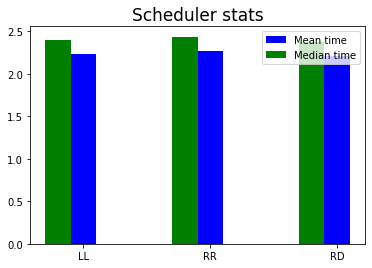

In [159]:
X = np.arange(len(avg_times))
ax = plt.subplot(111)
ax.bar(X, avg_times.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, median_times.values(), width=0.2, color='g', align='center')
ax.legend(('Mean time','Median time'))
plt.xticks(X, avg_times.keys())
plt.title("Scheduler stats", fontsize=17)
plt.show()

In [165]:
ts_tasks_3 = {}
ct = 0
for log in logs3:
    log = log.split('%')
    log[0] = log[0].strip()
    if log[1] == 'TASK RECEIVED':
        ct += 1
    elif log[1] == 'TASK COMPLETED':
        ct -= 1
    ts_tasks_3[convert_to_datetime(log[0])] = ct

In [166]:
ts_tasks_1

{datetime.datetime(2020, 12, 5, 11, 37, 35, 855000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 36, 867000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 37, 873000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 38, 886000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 39, 901000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 40, 916000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 41, 933000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 42, 947000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 43, 963000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 44, 980000): 0,
 datetime.datetime(2020, 12, 5, 11, 37, 45, 646000): 1,
 datetime.datetime(2020, 12, 5, 11, 37, 45, 994000): 1,
 datetime.datetime(2020, 12, 5, 11, 37, 46, 996000): 2,
 datetime.datetime(2020, 12, 5, 11, 37, 47, 8000): 2,
 datetime.datetime(2020, 12, 5, 11, 37, 47, 206000): 3,
 datetime.datetime(2020, 12, 5, 11, 37, 48, 19000): 2,
 datetime.datetime(2020, 12, 5, 11, 37, 48, 31000): 1,
 datetime.datetime(2020, 12, 5, 11, 37, 48, 32000): 

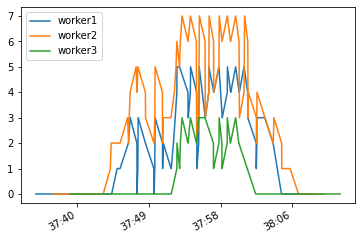

In [174]:
dates1 = matplotlib.dates.date2num(list(ts_tasks_1.keys()))
dates2 = matplotlib.dates.date2num(list(ts_tasks_2.keys()))
dates3 = matplotlib.dates.date2num(list(ts_tasks_3.keys()))
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(dates1, list(ts_tasks_1.values()), label = 'worker1')
plt.plot(dates2, list(ts_tasks_2.values()), label = 'worker2')
plt.plot(dates3, list(ts_tasks_3.values()), label = 'worker3')
plt.legend(loc="upper left")
xfmt = mdates.DateFormatter('%M:%S')
ax.xaxis.set_major_formatter(xfmt)

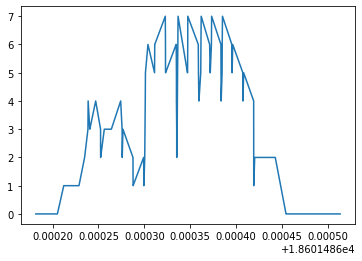

In [143]:
plt.plot(dates2, list(ts_tasks_2.values()))

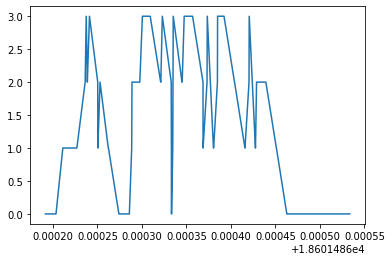

In [144]:
plt.plot(dates3, list(ts_tasks_3.values()))